In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn import svm
%matplotlib inline

In [3]:
import warnings

In [4]:
warnings.filterwarnings('ignore')

In [5]:
initial_data=pd.read_csv("C://wine/winequality-red.csv", sep=";")

In [6]:
initial_data.shape

(1599, 12)

In [7]:
initial_data.isnull().values.any()
#проверка на пропущенные значения

False

In [8]:
initial_data.describe()
#Возможно стоит удалить признакиоколо нулевой дисперсией (chlorides и density)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
initial_data["quality"].value_counts()
#выборка несбалансирована, для классификации удалить, классы (3,8,4)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

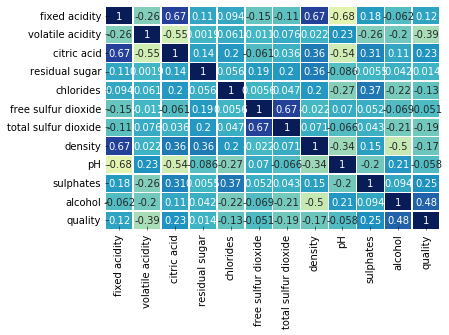

In [10]:
#матрица корреляций
sns.heatmap(initial_data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

In [11]:
#10-кратная кросс-валидация, с разбиением 70 на 30, все признаки и классы "как есть", без предобработки
accuracy=[]
f1score=[]
kappa=[]
for number in range(100):
        X_train, X_test, y_train, y_test = train_test_split(initial_data.drop('quality',axis=1), initial_data['quality'], test_size=0.3)
        model = RandomForestClassifier(max_depth=15, n_estimators=200)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        accuracy.append(accuracy_score(y_test,preds))
        f1score.append(f1_score(y_test,preds,average="weighted"))
        kappa.append(cohen_kappa_score(y_test,preds))
    

Accuracy_RF_Source=sum(accuracy)/len(accuracy)
F1score_RF_Source=sum(f1score)/len(f1score)
Kappa_RF_Source=sum(kappa)/len(kappa)
print (Accuracy_RF_Source)
print (F1score_RF_Source)
print (Kappa_RF_Source)

0.6810625
0.662059286598
0.481499878792


In [17]:
accuracy=[]
f1score=[]
kappa=[]
for number in range(100):
        X_train, X_test, y_train, y_test = train_test_split(initial_data.drop('quality',axis=1), initial_data['quality'], test_size=0.3)
        model = svm.SVC(kernel='linear')
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        accuracy.append(accuracy_score(y_test,preds))
        f1score.append(f1_score(y_test,preds,average="weighted"))
        kappa.append(cohen_kappa_score(y_test,preds))
    
Accuracy_SVM_Source=sum(accuracy)/len(accuracy)
F1score_SVM_Source=sum(f1score)/len(f1score)
Kappa_SVM_Source=sum(kappa)/len(kappa)
print (Accuracy_SVM_Source)
print (F1score_SVM_Source)
print (Kappa_SVM_Source)

0.614671052632
0.573487797873
0.318084936552


In [18]:
accuracy=[]
f1score=[]
kappa=[]
for number in range(100):
        X_train, X_test, y_train, y_test = train_test_split(initial_data.drop('quality',axis=1), initial_data['quality'], test_size=0.3)
        model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=8)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        accuracy.append(accuracy_score(y_test,preds))
        f1score.append(f1_score(y_test,preds,average="weighted"))
        kappa.append(cohen_kappa_score(y_test,preds))
    
Accuracy_GBC_Source=sum(accuracy)/len(accuracy)
F1score_GBC_Source=sum(f1score)/len(f1score)
Kappa_GBC_Source=sum(kappa)/len(kappa)
print (Accuracy_GBC_Source)
print (F1score_GBC_Source)
print (Kappa_GBC_Source)

0.71173245614
0.709501267923
0.516973931009


In [15]:
#удалим малочисленные классы
initial_data = initial_data[initial_data.quality != 4]
initial_data = initial_data[initial_data.quality != 8]
initial_data = initial_data[initial_data.quality != 3]

In [16]:
initial_data["quality"].value_counts()

5    681
6    638
7    199
Name: quality, dtype: int64

In [19]:
accuracy=[]
f1score=[]
kappa=[]
for number in range(100):
        X_train, X_test, y_train, y_test = train_test_split(initial_data.drop('quality',axis=1), initial_data['quality'], test_size=0.3)
        model = RandomForestClassifier(max_depth=15, n_estimators=200)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        accuracy.append(accuracy_score(y_test,preds))
        f1score.append(f1_score(y_test,preds,average="weighted"))
        kappa.append(cohen_kappa_score(y_test,preds))
    

Accuracy_RF_change=sum(accuracy)/len(accuracy)
F1score_RF_change=sum(f1score)/len(f1score)
Kappa_RF_change=sum(kappa)/len(kappa)
print (Accuracy_RF_change)
print (F1score_RF_change)
print (Kappa_RF_change)

0.718289473684
0.715426459353
0.525907736259


In [20]:
accuracy=[]
f1score=[]
kappa=[]
for number in range(100):
        X_train, X_test, y_train, y_test = train_test_split(initial_data.drop('quality',axis=1), initial_data['quality'], test_size=0.3)
        model = svm.SVC(kernel='linear')
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        accuracy.append(accuracy_score(y_test,preds))
        f1score.append(f1_score(y_test,preds,average="weighted"))
        kappa.append(cohen_kappa_score(y_test,preds))
    
Accuracy_SVM_change=sum(accuracy)/len(accuracy)
F1score_SVM_change=sum(f1score)/len(f1score)
Kappa_SVM_change=sum(kappa)/len(kappa)
print (Accuracy_SVM_change)
print (F1score_SVM_change)
print (Kappa_SVM_change)


0.607434210526
0.564751078794
0.307645737282


In [21]:
accuracy=[]
f1score=[]
kappa=[]
for number in range(100):
        X_train, X_test, y_train, y_test = train_test_split(initial_data.drop('quality',axis=1), initial_data['quality'], test_size=0.3)
        model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=8)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        accuracy.append(accuracy_score(y_test,preds))
        f1score.append(f1_score(y_test,preds,average="weighted"))
        kappa.append(cohen_kappa_score(y_test,preds))
    
Accuracy_GBC_change=sum(accuracy)/len(accuracy)
F1score_GBC_change=sum(f1score)/len(f1score)
Kappa_GBC_change=sum(kappa)/len(kappa)
print (Accuracy_GBC_change)
print (F1score_GBC_change)
print (Kappa_GBC_change)


0.711403508772
0.708906376028
0.515836702055


In [77]:
df2 = pd.DataFrame({ 'Accuracy' : np.array([Accuracy_RF_Source, Accuracy_SVM_Source, Accuracy_GBC_Source, Accuracy_RF_change, Accuracy_SVM_change, Accuracy_GBC_change]),
                    'Classificator' : np.array(["RF","SVM","GBC","RF","SVM","GBC"]),
                    'Type_data' : np.array(["Source","Source","Source","Deleted","Deleted","Deleted"])})
df2

,Accuracy,Classificator,Type_data
0,0.681062,RF,Source
1,0.614671,SVM,Source
2,0.711732,GBC,Source
3,0.718289,RF,Deleted
4,0.607434,SVM,Deleted
5,0.711404,GBC,Deleted
